In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
df = pd.read_csv(r"C:\Users\GamingWorld\Desktop\online_retail.csv")


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()  # Verificar tipos de datos y valores nulos
df.describe()  # Estadísticas básicas para columnas numéricas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df = df.dropna(subset=["CustomerID"])  


In [6]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


In [7]:
columns = ["InvoiceNo", "StockCode", "CustomerID", "Description", "Quantity", "UnitPrice", "TotalPrice", "InvoiceDate", "Country"]
df = df[columns]


In [8]:
df.head()

,InvoiceNo,StockCode,CustomerID,Description,Quantity,UnitPrice,TotalPrice,InvoiceDate,Country
0,536365,85123A,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom
1,536365,71053,17850.0,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
2,536365,84406B,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom
3,536365,84029G,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
4,536365,84029E,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom


In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
CustomerID     0
Description    0
Quantity       0
UnitPrice      0
TotalPrice     0
InvoiceDate    0
Country        0
dtype: int64

In [10]:
countryPrice = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
countryPrice

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


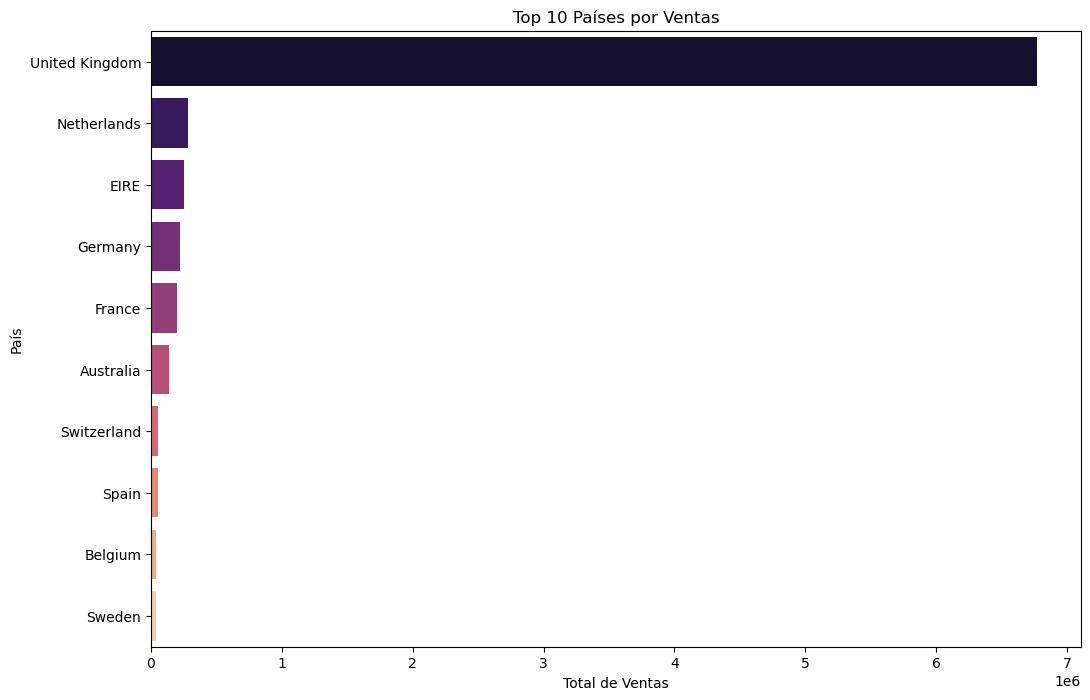

In [33]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=country_sales.index, x=country_sales.values, palette="magma")
plt.title("Top 10 Países por Ventas")
plt.xlabel("Total de Ventas")
plt.ylabel("País")
plt.show()


<Axes: xlabel='Country'>

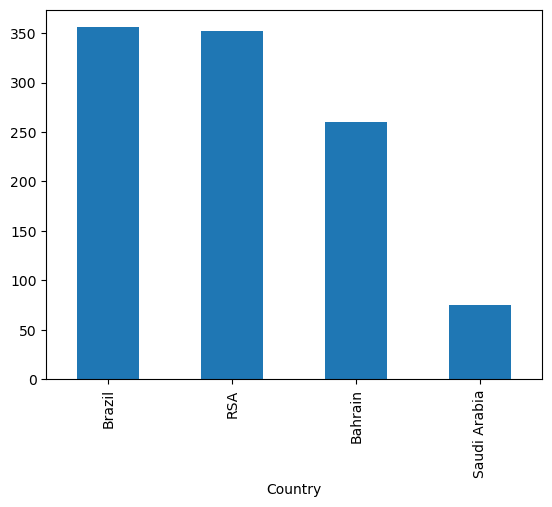

In [11]:
#5 con menos numero de compras
countryPrice[33:].plot(kind = 'bar')

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
timest= df['InvoiceDate'].dt.year
df['Year'] = timest
df.head()

,InvoiceNo,StockCode,CustomerID,Description,Quantity,UnitPrice,TotalPrice,InvoiceDate,Country,Year
0,536365,85123A,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,536365,71053,17850.0,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,536365,84406B,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,536365,84029G,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,536365,84029E,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010


<Axes: xlabel='Year'>

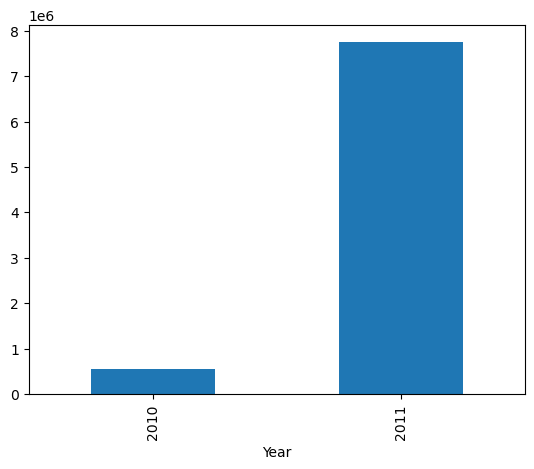

In [13]:
df.groupby('Year')['TotalPrice'].sum().plot(kind='bar')

<Axes: title={'center': 'Ventas por meses'}, xlabel='Mon,Year'>

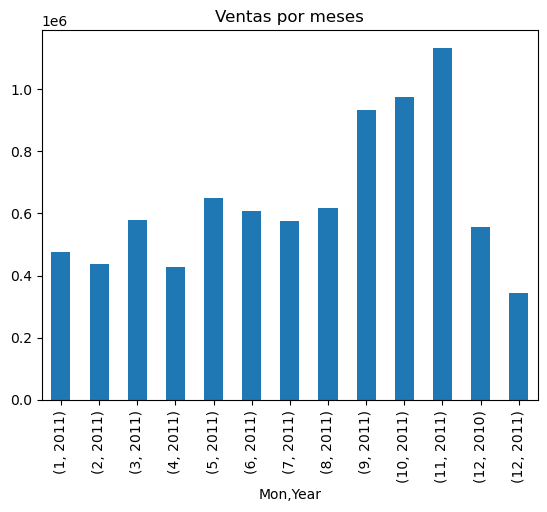

In [14]:
df['Mon'] = df['InvoiceDate'].dt.month
df['month'] = df['InvoiceDate'].dt.month_name()
df.groupby(['Mon','Year'])['TotalPrice'].sum().plot(kind='bar', title = 'Ventas por meses')
#dec 2011 tiene una gran caida

In [15]:
get_2011 = df[(df['Year'] == 2011)]
get_dec2011 = get_2011[(df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

C:\Users\GamingWorld\AppData\Local\Temp\ipykernel_18252\2284910402.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(df['month'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [31]:
# solo hubieron 9 dias en diciembre (en la data), por eso el decremento abrupto

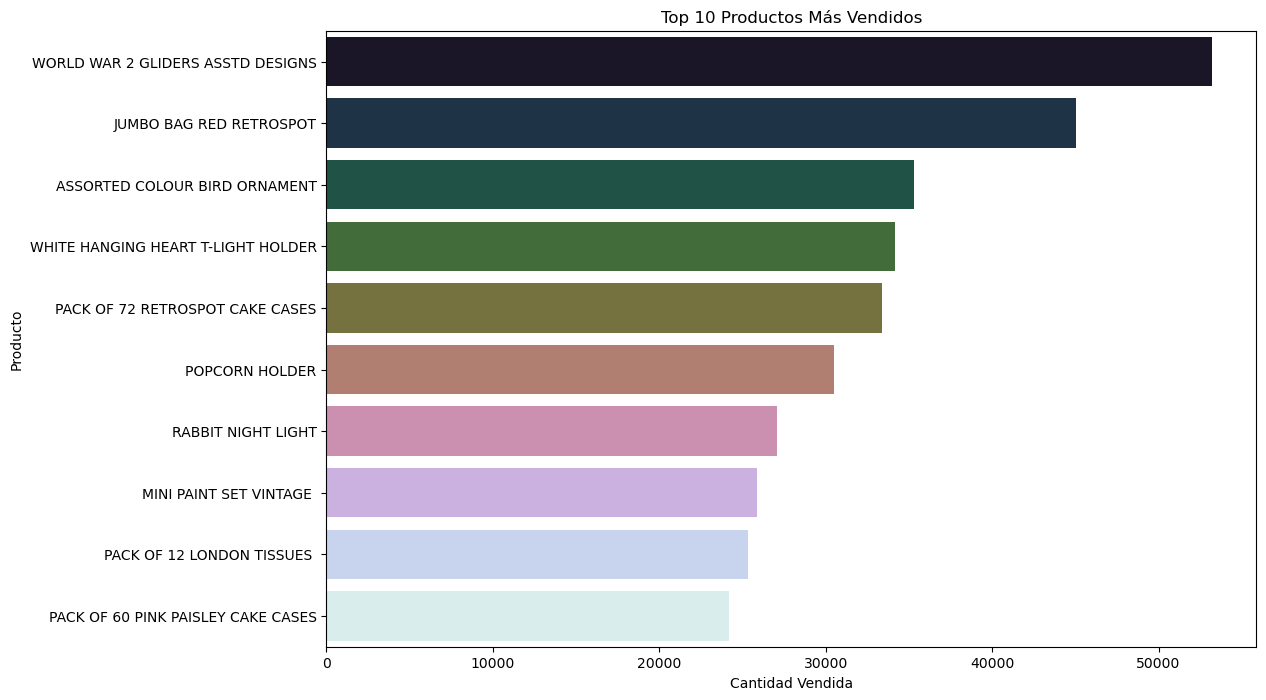

In [16]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_products.index, x=top_products.values, palette="cubehelix")
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Producto")
plt.show()


<Axes: title={'center': 'Clientes por pais'}, xlabel='Country'>

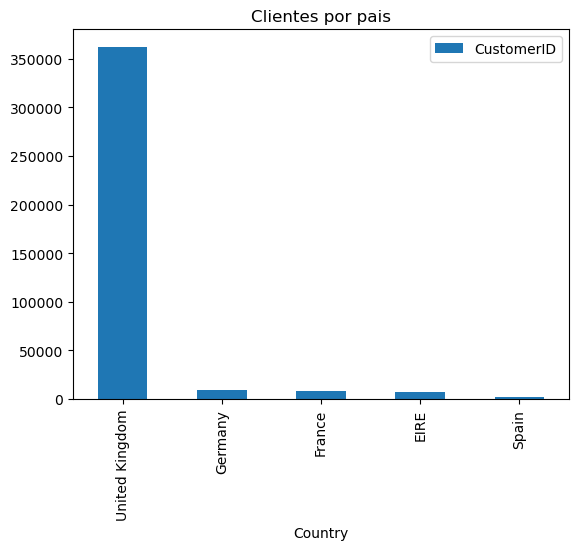

In [20]:
#paises con mas numero de clientes
cus_id = pd.DataFrame(df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = "bar", title = 'Clientes por pais')

In [22]:
# venta promedio de cada prodcuto
avg_sales = df.groupby(['StockCode', 'Description'])[['Quantity', 'TotalPrice']].mean().sort_values(by='Quantity', ascending=False)
avg_sales


,,Quantity,TotalPrice
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000
